# Global Energy Budget

Let's read a netcdf file that include information on global energy budget. <br>
First, let's import modules that we will be using.

In [1]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

Open and read the outgoing longwave radiation (OLR) file 'olr_mean_regrid.nc'. This file can be downloaded from Canvas/files/data.

In [2]:
filename='olr.mon.ltm.nc'
with xr.open_dataset(filename) as ds1:      
    print(ds1)

<xarray.Dataset>
Dimensions:  (lon: 144, lat: 73, time: 12)
Coordinates:
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * time     (time) object 0001-01-01 00:00:00 ... 0001-12-01 00:00:00
Data variables:
    olr      (time, lat, lon) float32 ...
Attributes:
    title:        Monthly Long Term Mean from NOAA interpolated OLR Dataset
    history:      LTM calculated by CAS. File updated (metadata) 10/2003
    description:  Calculated from monthly means formed from Interpolated NOAA...
    platform:     Observation
    Conventions:  COARDS
    reference:    Liebmann and Smith (Bulletin of the American Meteorological...
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.interp_OLR.html


/Users/jungeunl/miniconda3/lib/python3.9/site-packages/xarray/coding/times.py:123: SerializationWarning: Ambiguous reference date string: 1-1-1 00:00:0.0. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 00:00:0.0). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)
/Users/jungeunl/miniconda3/lib/python3.9/site-packages/xarray/coding/times.py:526: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Users/jungeunl/miniconda3/lib/python3.9/site-packages/xarray/core/indexing.py:422: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, r

In [4]:
olr=ds1.olr
olr

<xarray.DataArray 'olr' (time: 12, lat: 73, lon: 144)>
[126144 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * time     (time) object 0001-01-01 00:00:00 ... 0001-12-01 00:00:00
Attributes:
    long_name:             OLR longterm monthly means
    unpacked_valid_range:  [  0. 500.]
    actual_range:          [136.16034 292.9076 ]
    units:                 W/m^2
    var_desc:              Outgoing Longwave Radiation
    precision:             2
    dataset:               NOAA Interpolated OLR
    level_desc:            Other
    statistic:             Long Term Mean
    parent_stat:           Mean
    valid_range:           [-32765  17235]

Let's calculate annual average.

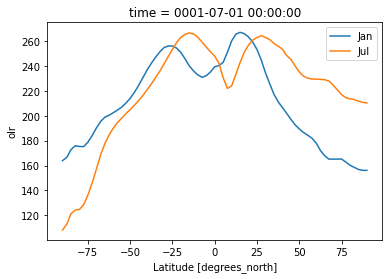

In [7]:
olr_ann=ds1.olr.mean(dim='time')
olr_ann

<xarray.DataArray 'olr' (lat: 73, lon: 144)>
array([[179.12665 , 179.12665 , 179.12665 , ..., 179.12665 , 179.12665 ,
        179.12665 ],
       [180.0625  , 180.09334 , 180.11916 , ..., 179.87581 , 179.92334 ,
        179.9775  ],
       [182.02582 , 182.10834 , 182.15749 , ..., 181.70667 , 181.79417 ,
        181.88332 ],
       ...,
       [130.60333 , 129.92749 , 129.24834 , ..., 133.19835 , 132.56166 ,
        131.905   ],
       [129.77083 , 129.485   , 129.1975  , ..., 130.955   , 130.67749 ,
        130.39833 ],
       [127.174164, 127.174164, 127.174164, ..., 127.174164, 127.174164,
        127.174164]], dtype=float32)
Coordinates:
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0

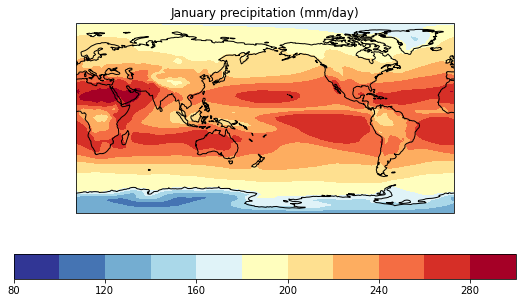

In [11]:
# Make a prettier plot
lev1=np.arange(80,320,20)
proj = ccrs.PlateCarree()
# color map
cmap1=plt.cm.RdYlBu_r

fig1 = plt.figure(figsize=(9,5))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
cs=olr_ann.plot.contourf(ax=ax, transform=ccrs.PlateCarree(), levels=lev1,cmap=cmap1, add_colorbar=False, add_labels=False)
ax.coastlines()
plt.title('Annual Mean Outgoing Longwave Radiation (W/m2)')
fig1.colorbar(cs, orientation='horizontal') # color map

Plot incoming shortwave radiation. Let's first read the file 'toa_sw.nc' <br>

In [23]:
filename2='toa_sw.nc' 
with xr.open_dataset(filename2) as ds2:      
    print(ds2)

<xarray.Dataset>
Dimensions:    (longitude: 480, latitude: 241, time: 12)
Coordinates:
  * longitude  (longitude) float32 0.0 0.75 1.5 2.25 ... 357.0 357.8 358.5 359.2
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 ... -88.5 -89.25 -90.0
  * time       (time) datetime64[ns] 2016-01-01 2016-02-01 ... 2016-12-01
Data variables:
    tsr        (time, latitude, longitude) float32 ...
    tisr       (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2017-10-10 16:27:43 GMT by grib_to_netcdf-2.4.0: grib_to_ne...


In [26]:
swn=ds2.tsr/24./3600. # TOA net solar radiation in W/m2
swd=ds2.tisr/24./3600. # TOA incident solar radiation in W/m2

#### Exercise
Calculate the annual average of swn and swd.

#### Exercise
Make a map of TOA net solar radiation

## Zonal average
Let's Calculate the zonal average (average along the x-axis)

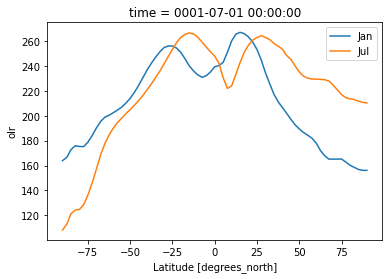

In [21]:
olr_mean=ds1.olr.mean(dim='lon')
olr_mean.isel(time=0).plot(label='Jan')
olr_mean.isel(time=6).plot(label='Jul')
plt.legend()

Make a plot.

#### Exercise
Calculate and plot the zonal average of net shortwave radiation for January and July.

#### Exercise
Calculate and plot the zonal average of incident shortwave radiation for January and July.